<a href="https://colab.research.google.com/github/frammartina/Applied-AI-project/blob/main/1_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI/Final_assignment


Mounted at /content/drive
/content/drive/MyDrive/AI/Final_assignment


In [ ]:
!pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 42.3 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow import keras as keras


# Set seeds for random number generators in NumPy, Python and Tensor Flow
seed=42
np.random.seed(42)
tf.random.set_seed(42);
tf.compat.v1.set_random_seed(42);

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from PIL import Image
import matplotlib.gridspec as gridspec
import cv2
import keras_cv
from sklearn.utils.class_weight import compute_class_weight
#import nrrd # to open our images
#from cleanvision import Imagelab

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


## ⏳ Load the Data

In [ ]:
full_slice_clean= np.load('/content/drive/MyDrive/AI/Final_assignment/full_slice_dataset_clean.npy')
tumor_class_clean = np.load('/content/drive/MyDrive/AI/Final_assignment/tumor_class_clean.npy')
nodule_dataset = np.load('/content/drive/MyDrive/AI/Final_assignment/nodule_dataset.npy')
df = pd.read_excel('/content/drive/MyDrive/AI/Final_assignment/dataset_lung.xlsx')
tumor_class = df['TumorClass'].values

print(f"number of full_slice images: {len(full_slice_clean)}")
print(f"number of full_slice labels: {len(tumor_class_clean)}")

print(f'number of nodule images: {len(nodule_dataset)}')
print(f"number of nodule labels:{len(tumor_class)}")

number of full_slice images: 2265
number of full_slice labels: 2265
number of nodule images: 2363
number of nodule labels:2363


## 🔧 Prepare dataset

In [ ]:
# TRAIN - TEST SPLIT FULL_SLICES
# Split the data into training and validation sets (80% train, 20% val/test)
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(full_slice_clean, tumor_class_clean, test_size=0.2, random_state=42, stratify=tumor_class_clean)

# Print the shapes of the loaded datasets
print("Training Data Shape:", X_train_full.shape)
print("Training Label Shape:", y_train_full.shape)
print("validation Data Shape:", X_val_full.shape)
print("validation Label Shape:", y_val_full.shape)

Training Data Shape: (1812, 512, 512)
Training Label Shape: (1812,)
validation Data Shape: (453, 512, 512)
validation Label Shape: (453,)


In [ ]:
# TRAIN - TEST SPLIT NODULE
# Split the data into training and validation sets (80% train, 20% val/test)
X_train_nodule, X_val_nodule, y_train_nodule, y_val_nodule = train_test_split(nodule_dataset, tumor_class, test_size=0.2, random_state=42, stratify=tumor_class)

# Print the shapes of the loaded datasets
print("Training Data Shape:", X_train_nodule.shape)
print("Training Label Shape:", y_train_nodule.shape)
print("validation Data Shape:", X_val_nodule.shape)
print("validation Label Shape:", y_val_nodule.shape)

Training Data Shape: (1890, 64, 64)
Training Label Shape: (1890,)
validation Data Shape: (473, 64, 64)
validation Label Shape: (473,)


In [ ]:
#From list to tensor
X_train_full = np.asarray(X_train_full)
y_train_full = np.asarray(y_train_full)
X_val_full = np.asarray(X_val_full)
y_val_full = np.asarray(y_val_full)


#From list to tensor
X_train_nodule = np.asarray(X_train_nodule)
y_train_nodule = np.asarray(y_train_nodule)
X_val_nodule = np.asarray(X_val_nodule)
y_val_nodule = np.asarray(y_val_nodule)


In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)

(1812, 512, 512)
(1812,)


## 🔄 Process Data:

In [ ]:
# add the extra dimension for the color
X_train_full = np.expand_dims(X_train_full, axis=-1)  # add an extra channel in X_train
X_val_full = np.expand_dims(X_val_full, axis=-1)  # same for X_val
X_train_nodule = np.expand_dims(X_train_nodule, axis=-1)
X_val_nodule = np.expand_dims(X_val_nodule, axis=-1)

# add an extra dimension
#y_train_full = np.expand_dims(y_train_full, axis=-1)  # add an extra channel in X_train
#y_val_full = np.expand_dims(y_val_full, axis=-1)  # same for X_val
#y_train_nodule = np.expand_dims(y_train_nodule, axis=-1)
#y_val_nodule = np.expand_dims(y_val_nodule, axis=-1)

print("full_slices:")
print(f"X_train: {X_train_full.shape}")
print(f"y_train: {y_train_full.shape}")
print(f"X_val: {X_val_full.shape}")
print(f"y_val: {y_val_full.shape}")
print("\n")

print("nodules:")
print(f"X_train: {X_train_nodule.shape}")
print(f"y_train: {y_train_nodule.shape}")
print(f"X_val: {X_val_nodule.shape}")
print(f"y_val: {y_val_nodule.shape}")

full_slices:
X_train: (1812, 512, 512, 1)
y_train: (1812,)
X_val: (453, 512, 512, 1)
y_val: (453,)


nodules:
X_train: (1890, 64, 64, 1)
y_train: (1890,)
X_val: (473, 64, 64, 1)
y_val: (473,)


In [ ]:
# check the type
print(X_train_nodule.dtype)
print(y_train_nodule.dtype)
print(X_train_full.dtype)
print(y_train_full.dtype)
# i will transform everything into float32 because this format is better to be fed into the network

int16
int64
int16
int64


In [ ]:
# trasform in tf.float32
X_train_full = X_train_full.astype(np.float32)
y_train_full = y_train_full.astype(np.float32)
X_val_full = X_val_full.astype(np.float32)
y_val_full = y_val_full.astype(np.float32)

X_train_nodule = X_train_nodule.astype(np.float32)
y_train_nodule = y_train_nodule.astype(np.float32)
X_val_nodule = X_val_nodule.astype(np.float32)
y_val_nodule= y_val_nodule.astype(np.float32)

Normalization

In [ ]:
# Normalize data to the range [0, 1]
X_train_full = (X_train_full / 255).astype('float32')
X_val_full = (X_val_full / 255).astype('float32')
X_train_nodule = (X_train_nodule / 255).astype('float32')
X_val_nodule = (X_val_nodule / 255).astype('float32')

class distribution

number of samples for each class: 
{1.0: 186, 2.0: 348, 3.0: 838, 4.0: 322, 5.0: 118}


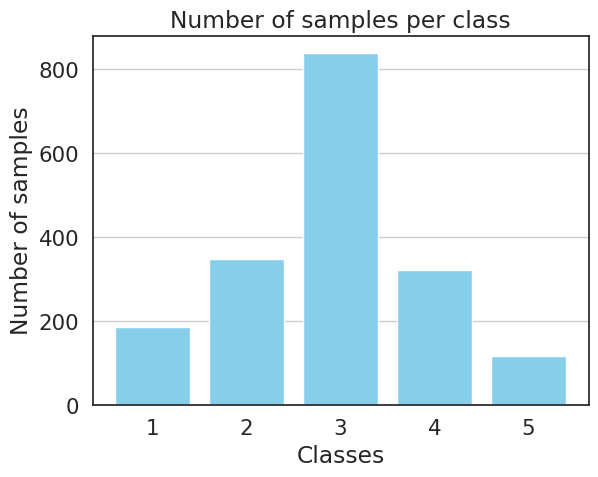

class weights full: {0: 1.9483870967741936, 1: 1.0413793103448277, 2: 0.4324582338902148, 3: 1.1254658385093168, 4: 3.071186440677966}


In [ ]:
# 1. FULL_SLICED

unique, counts = np.unique(y_train_full, return_counts=True)
print("number of samples for each class: ")
print(dict(zip(unique, counts)))

# show
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(unique)
plt.grid(axis='y')
plt.show()

# CLASS WEIGHTS
class_weights_full = compute_class_weight('balanced', classes=np.unique(y_train_full), y=y_train_full)
class_weights_full = dict(enumerate(class_weights_full))
print("class weights full:", class_weights_full)


number of samples for each class: 
{1.0: 195, 2.0: 366, 3.0: 873, 4.0: 334, 5.0: 122}


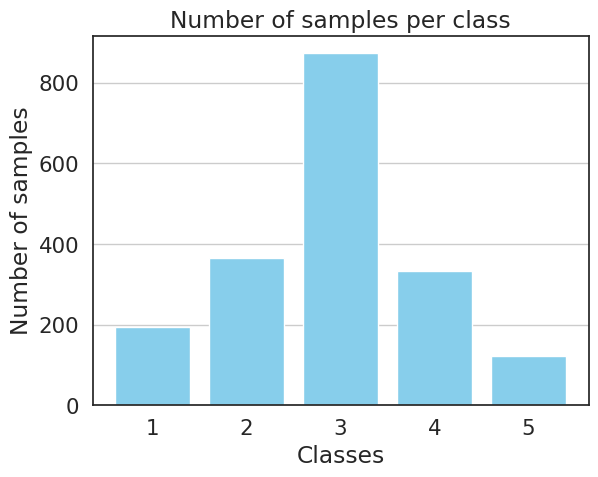

class weights nodule: {0: 1.9384615384615385, 1: 1.0327868852459017, 2: 0.4329896907216495, 3: 1.1317365269461077, 4: 3.098360655737705}


In [ ]:
# 2. NODULE

unique, counts = np.unique(y_train_nodule, return_counts=True)
print("number of samples for each class: ")
print(dict(zip(unique, counts)))

# show
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(unique)
plt.grid(axis='y')
plt.show()

# CLASS WEIGHTS
class_weights_nodule = compute_class_weight('balanced', classes=np.unique(y_train_nodule), y=y_train_nodule)
class_weights_nodule = dict(enumerate(class_weights_nodule))
print("class weights nodule:", class_weights_nodule)


# the 2 are very similar (as expected) but slighly different (because in the full_sliced we have removed some samples)

one-hot encoding

In [ ]:
# Convert labels to categorical format using one-hot encoding
# in one-hot the index start from 0 => i have to convert into from 0 to 4 in order to have 5 classes
y_train_full = tfk.utils.to_categorical(y_train_full - 1)
y_val_full = tfk.utils.to_categorical(y_val_full - 1)
y_train_nodule = tfk.utils.to_categorical(y_train_nodule - 1)
y_val_nodule = tfk.utils.to_categorical(y_val_nodule - 1)

print(y_val_full.shape)
# ok, 5 classes (0-4 which corrispond to the real classes 1-5) => at the end I have to make +1 to the predictions

(453, 5)


## 🎨 Augmentation

In [ ]:
from tensorflow import keras
augmentation= keras.Sequential([
    # trasformazioni geometriche
    #keras_cv.layers.RandAugment(value_range=(0, 1), augmentations_per_image=3), # applica ≠ trasformazioni casualmente (scalamento, rotazioni, ...)
    tfkl.RandomFlip("horizontal", seed=seed),  # Ribaltamenti completi
    #tfkl.RandomTranslation(0.1, 0.1, fill_mode='wrap', seed=seed),  # Maggiore traslazione
    #tfkl.RandomRotation(0.3, fill_mode='reflect', seed=seed),  # Rotazioni
    #tfkl.RandomZoom(height_factor=0.1, width_factor=0.2, fill_mode='nearest', seed=seed),
    #keras_cv.layers.RandomShear(x_factor=0.2, y_factor=0.2),   # distorsioni geometriche (immagini inclinate)

    # tecniche di mescolamento
    #keras_cv.layers.CutMix(), # sostituisce una porzione di immagine con una di un'altra immagine
    #keras_cv.layers.MixUp(),  # somma due imagini in maniera lineare
    #keras_cv.layers.RandomCutout(height_factor=0.2, width_factor=0.2), # non ha senso qui (magari mi oscura il tumore)

    # trasformazioni di colore/canale
    # keras_cv.layers.RandomChannelShift(factor=0.1, value_range=(0, 1)),   # disturbi cromatici
    #keras_cv.layers.RandomSaturation(factor=0.4),    # no for grayscale images
    #tfkl.RandomBrightness(0.2, value_range=(0,1), seed=seed),  # Variazione luminosità ridotta
    #keras_cv.layers.AutoContrast(value_range=(0, 1)),
    #keras_cv.layers.RandomSharpness(factor=0.2, value_range=(0, 1)),
], name='augmentation')

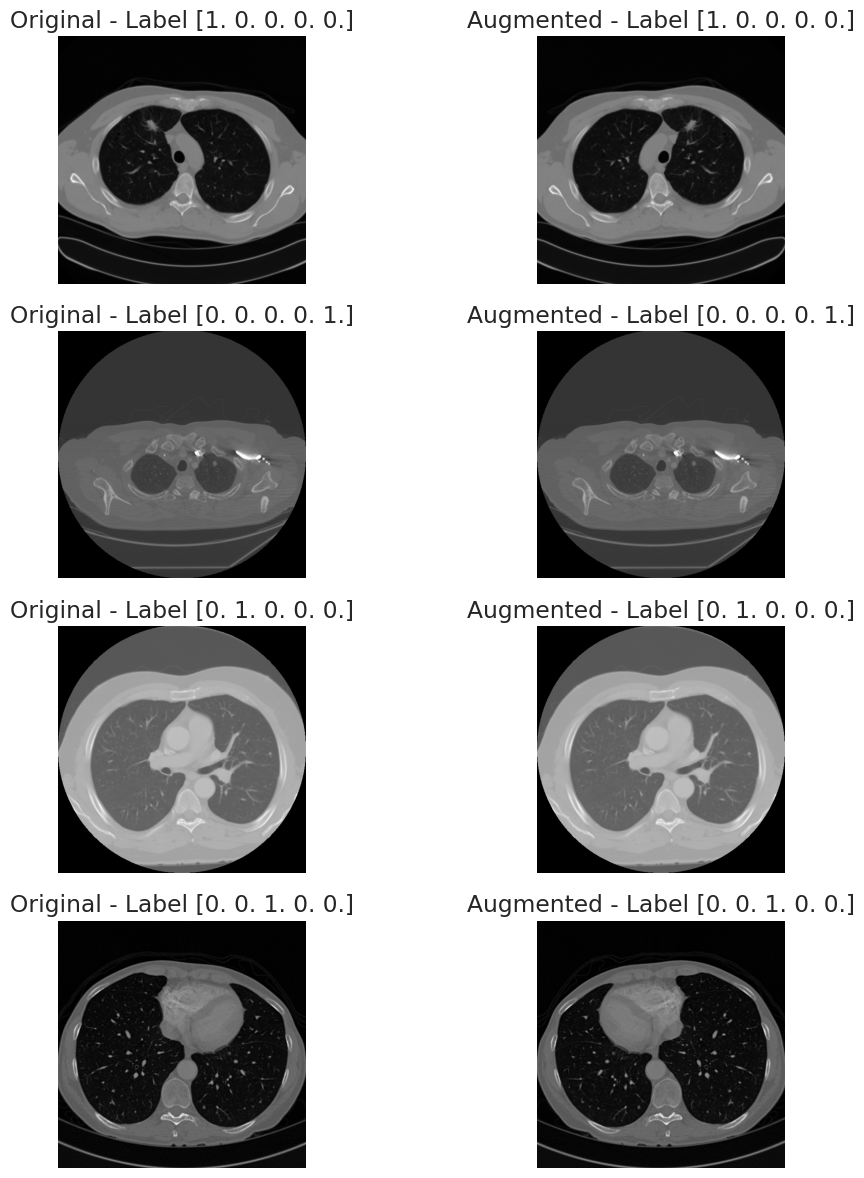

In [ ]:
# Prendi 4 immagini casuali da X_train
sample_images = X_train_full[np.random.choice(X_train_full.shape[0], 4, replace=False)]
sample_labels = y_train_full[np.random.choice(y_train_full.shape[0], 4, replace=False)]

# Crea una figura per visualizzare le immagini
plt.figure(figsize=(12, 12))

# Applica l'augmentation su ciascuna immagine e visualizzale
for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    # Aggiungi una dimensione batch (aggiungi una dimensione in più per batch)
    image_batch = image[tf.newaxis]

    # Applica l'augmentation
    augmented_image = augmentation(image_batch)  # Restituisce direttamente il tensore aumentato

    # Rimuovi la dimensione batch per visualizzare l'immagine
    augmented_image = augmented_image[0].numpy()

    # Visualizza l'immagine originale (a sinistra) e l'immagine aumentata (a destra)
    plt.subplot(4, 2, 2 * i + 1)  # Colonna per le immagini originali
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Original - Label {label}")

    plt.subplot(4, 2, 2 * i + 2)  # Colonna per le immagini aumentate
    plt.imshow(augmented_image, cmap='gray')
    plt.axis('off')
    plt.title(f"Augmented - Label {label}")

plt.tight_layout()
plt.show()


## 🏗️ Model

### 1. full_slice 5-class

In [ ]:
# Input shape for the model
input_shape = X_train_full.shape[1:]

# Output shape for the model
output_shape = y_train_full.shape[1]

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (512, 512, 1)
Output Shape: 5


In [ ]:
# set batch size for training
BATCH_SIZE = 32

# set learning rate for the optimiser
LEARNING_RATE = 1e-4

# set early stopping patience threshold
PATIENCE = 15

# set maximum number of training epochs
EPOCHS = 250


In [ ]:
seed=42
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    augmentation=augmentation,
    seed=seed
):
    # Set the random seed for reproducibility
    tf.random.set_seed(seed)

    # Define the input layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Apply augmentation
    x = augmentation(input_layer)

    # first convolutional layer
    x = tfkl.Conv2D(filters=16, kernel_size=3, padding='same', name='conv0')(x)
    x = tfkl.ReLU(name='relu0')(x)
    x = tfkl.MaxPooling2D(name='mp0')(x)

    # second convolutional layer, activation, and pooling
    x = tfkl.Conv2D(filters=32, kernel_size=3, padding='same', name='conv1')(x)
    x = tfkl.ReLU(name='relu1')(x)
    x = tfkl.MaxPooling2D(name='mp1')(x)

    # third convolutional layer, activation, and pooling
    x = tfkl.Conv2D(filters=64, kernel_size=3, padding='same', name='conv2')(x)
    x = tfkl.ReLU(name='relu2')(x)
    x = tfkl.MaxPooling2D(name='mp2')(x)

    # fourth convolutional layer, activation, and pooling
    x = tfkl.Conv2D(filters=128, kernel_size=3, padding='same', name='conv3')(x)
    x = tfkl.ReLU(name='relu3')(x)
    x = tfkl.MaxPooling2D(name='mp3')(x)

    # fifth convolutional layer, activation, and pooling
    x = tfkl.Conv2D(filters=256, kernel_size=3, padding='same', name='conv4')(x)
    x = tfkl.ReLU(name='relu4')(x)
    x = tfkl.Flatten(name='flatten')(x)

    # output layer with softmax activation for classification
    output_layer = tfkl.Dense(units=output_shape, activation='softmax', name='Output')(x)

    # create the model
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='CNN')

    # Return the compiled model
    return model

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 512, 512, 1)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ augmentation (Sequential)           │ (None, 512, 512, 1)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│    └ random_flip (RandomFlip)       │ (1, 512, 512, 1)             │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv0 (Conv2D)                      │ (None, 512, 512, 16)         │           160 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu0 (ReLU)                        │ (None, 512, 512, 16)         │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp0 (MaxPooling2D)                  │ (None, 256, 256, 16)         │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1 (Conv2D)                      │ (None, 256, 256, 32)         │         4,640 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu1 (ReLU)                        │ (None, 256, 256, 32)         │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp1 (MaxPooling2D)                  │ (None, 128, 128, 32)         │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2 (Conv2D)                      │ (None, 128, 128, 64)         │        18,496 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu2 (ReLU)                        │ (None, 128, 128, 64)         │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp2 (MaxPooling2D)                  │ (None, 64, 64, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv3 (Conv2D)                      │ (None, 64, 64, 128)          │        73,856 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu3 (ReLU)                        │ (None, 64, 64, 128)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp3 (MaxPooling2D)                  │ (None, 32, 32, 128)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv4 (Conv2D)                      │ (None, 32, 32, 256)          │       295,168 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ relu4 (ReLU)                        │ (None, 32, 32, 256)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten (Flatten)                   │ (None, 262144)               │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Output (Dense)                      │ (None, 5)                    │     1,310,725 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 1,703,045 (6.50 MB)

 Trainable params: 1,703,045 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

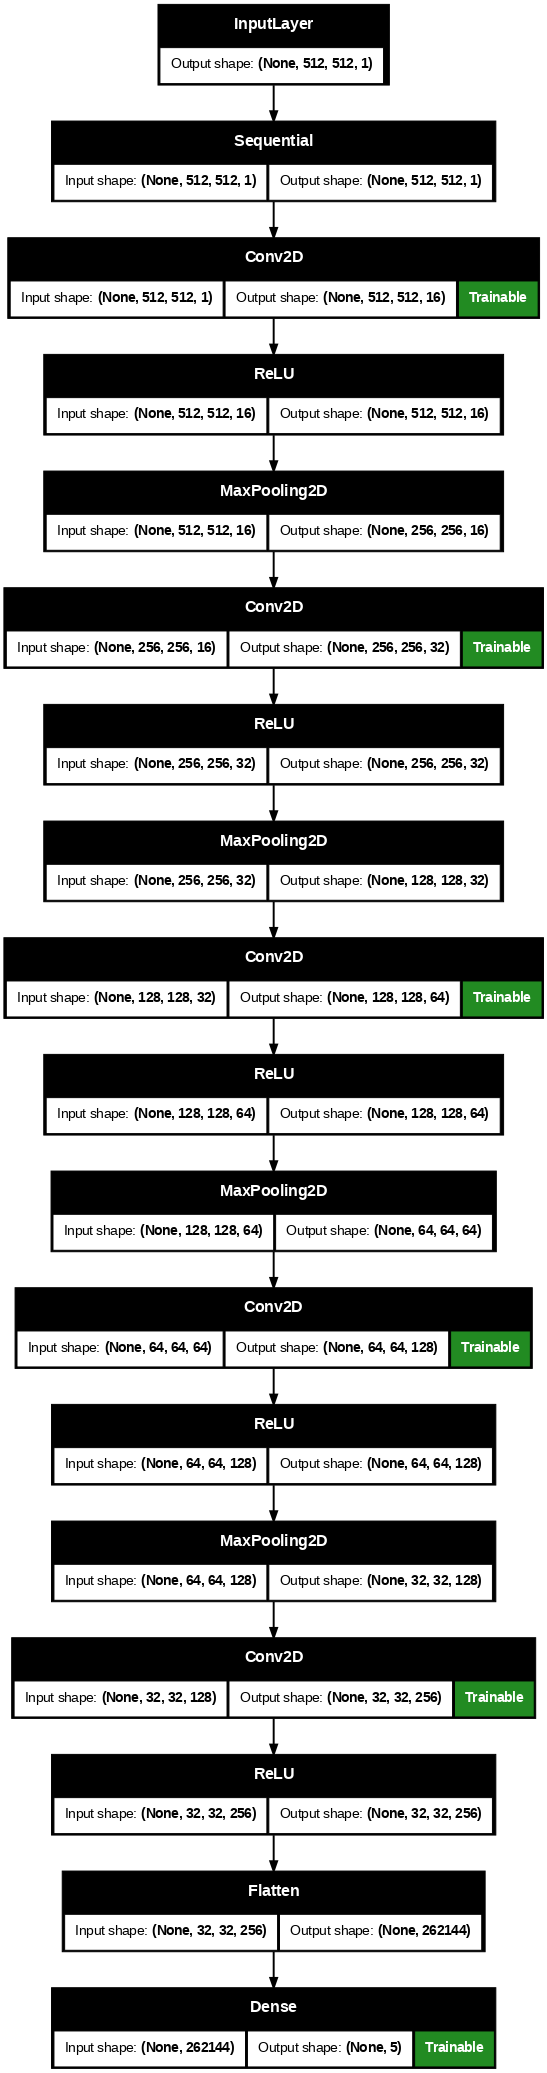

In [ ]:
# Build the model with specified input and output shapes
model = build_model()
#model = build_model(input_shape=input_shape, output_shape=output_shape, learning_rate=learning_rate)

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model
#loss = tfk.losses.CategoricalCrossentropy()  # !! SMOOTHINH DIMINUISCE LA CONFIDENZA. PROVARE ANCHE SENZA
loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)   # smoothing to prevent overfitting due to MixUp e CutMix
optimizer = tfk.optimizers.AdamW(LEARNING_RATE)
#optimizer = tf.keras.optimizers.SGD(learning_rate, momentum=0.9)
metrics=[tf.keras.metrics.CategoricalAccuracy()]
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)


In [ ]:
# Setup callbacks

# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    mode='max',
    patience=PATIENCE,
    restore_best_weights=True
)

# LR_schedule
LR_schedule = tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    min_delta=5e-5)


In [ ]:
history = model.fit(
    x=X_train_full,
    y=y_train_full,  # Etichette di training (one-hot encoded)
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val_full, y_val_full),
    callbacks=[early_stopping, LR_schedule],
    class_weight=class_weights_full,
    verbose=1
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_categorical_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'CNN_'+str(final_val_accuracy)+'.keras'
model.save(model_filename)

del model

Epoch 1/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 400ms/step - categorical_accuracy: 0.1541 - loss: 1.7218 - val_categorical_accuracy: 0.2561 - val_loss: 1.5982 - learning_rate: 1.0000e-04
Epoch 2/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - categorical_accuracy: 0.3673 - loss: 1.5841 - val_categorical_accuracy: 0.2715 - val_loss: 1.5891 - learning_rate: 1.0000e-04
Epoch 3/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - categorical_accuracy: 0.3091 - loss: 1.5587 - val_categorical_accuracy: 0.2958 - val_loss: 1.5742 - learning_rate: 1.0000e-04
Epoch 4/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - categorical_accuracy: 0.3558 - loss: 1.5102 - val_categorical_accuracy: 0.2009 - val_loss: 1.6348 - learning_rate: 1.0000e-04
Epoch 5/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - categorical_accuracy: 0.3633 - loss: 1.4326 - val_categorical_accuracy: 0.2009 - val_loss: 1.6880 - learning_rate: 1.0000e-04
Epoch 6/250
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - categorical_accuracy: 0.4015 - loss: 1

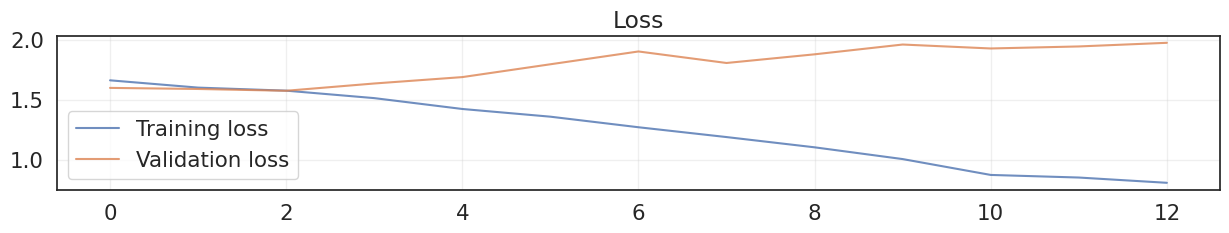

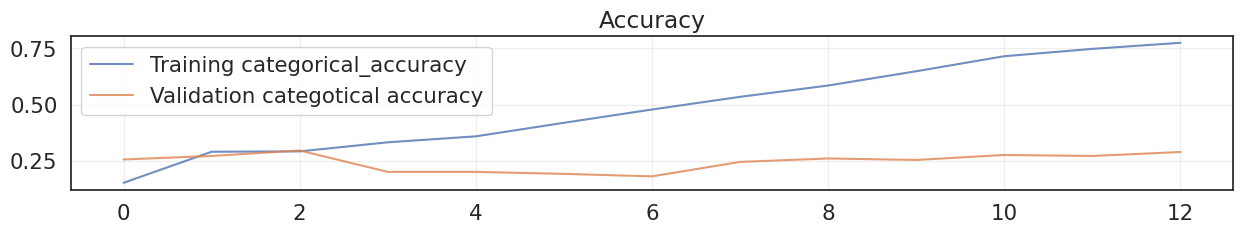

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['categorical_accuracy'], label='Training categorical_accuracy', alpha=.8)
plt.plot(history['val_categorical_accuracy'], label='Validation categotical accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
from tensorflow import keras as keras
# Build the model with specified input and output shapes
model_full = keras.models.load_model(model_filename)
#model_full = keras.models.load_model('CNN_6.62.keras')

preds_full = model_full.predict(X_val_full, verbose=0)
print("Predictions Shape:", preds_full.shape)

Predictions Shape: (453, 5)


In [ ]:
pred_classes_full = np.argmax(preds_full, axis=1) # not in one-hot
pred_classes_full = pred_classes_full + 1

In [ ]:
preds_full[3]

array([0.21791366, 0.2037827 , 0.27184367, 0.17815681, 0.12830319],
      dtype=float32)

In [ ]:
print(pred_classes_full[3])
print(y_val_full[3])

3
[0. 0. 0. 1. 0.]


Accuracy score over the test set: 0.2958
Precision score over the test set: 0.3005
Recall score over the test set: 0.2958
F1 score over the test set: 0.2901


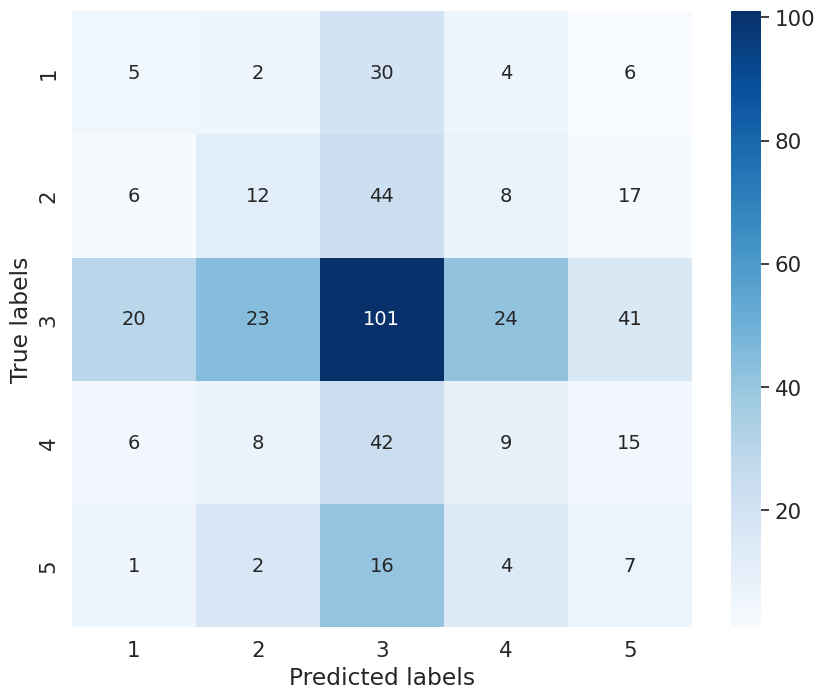

In [ ]:
# Convert predictions to class labels
#pred_classes_full = np.argmax(preds_full, axis=-1)

# Extract ground truth classes
true_classes = np.argmax(y_val_full, axis=-1)
true_classes = true_classes + 1

# Calculate and display test set accuracy
accuracy = accuracy_score(true_classes, pred_classes_full)
print(f'Accuracy score over the test set: {round(accuracy, 4)}')

# Calculate and display test set precision
precision = precision_score(true_classes, pred_classes_full, average='weighted')
print(f'Precision score over the test set: {round(precision, 4)}')

# Calculate and display test set recall
recall = recall_score(true_classes, pred_classes_full, average='weighted')
print(f'Recall score over the test set: {round(recall, 4)}')

# Calculate and display test set F1 score
f1 = f1_score(true_classes, pred_classes_full, average='weighted')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, pred_classes_full)

# Combine numbers and percentages into a single string for annotation
annot = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

labels={1,2,3,4,5}
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm.T, annot=annot, fmt='', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
#@title Implementation
import cv2
from tensorflow.keras.models import Model,Sequential

def GradCam(model, img_array, layer_name, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model

    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = Model(
			inputs=[model.inputs],
			outputs=[model.get_layer(layer_name).output,
				model.output])

    with tf.GradientTape() as tape: # gradient of the loss with respect to the activation function
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
      inputs = tf.cast(img_array, tf.float32) #we use the preprocessed image
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, 0]

    # use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)

    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]

    # compute the average of the gradient values, and using them
	# as weights, compute the ponderation of the filters with
	# respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

    # grab the spatial dimensions of the input image and resize the output class activation map to match the input image dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))

	# normalize the heatmap such that all values lie in the range [0, 1], scale the resulting values to the range [0, 255], and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom

    # heatmap = (heatmap * 255).astype("uint8") return the resulting heatmap to the calling function
    return heatmap,predictions

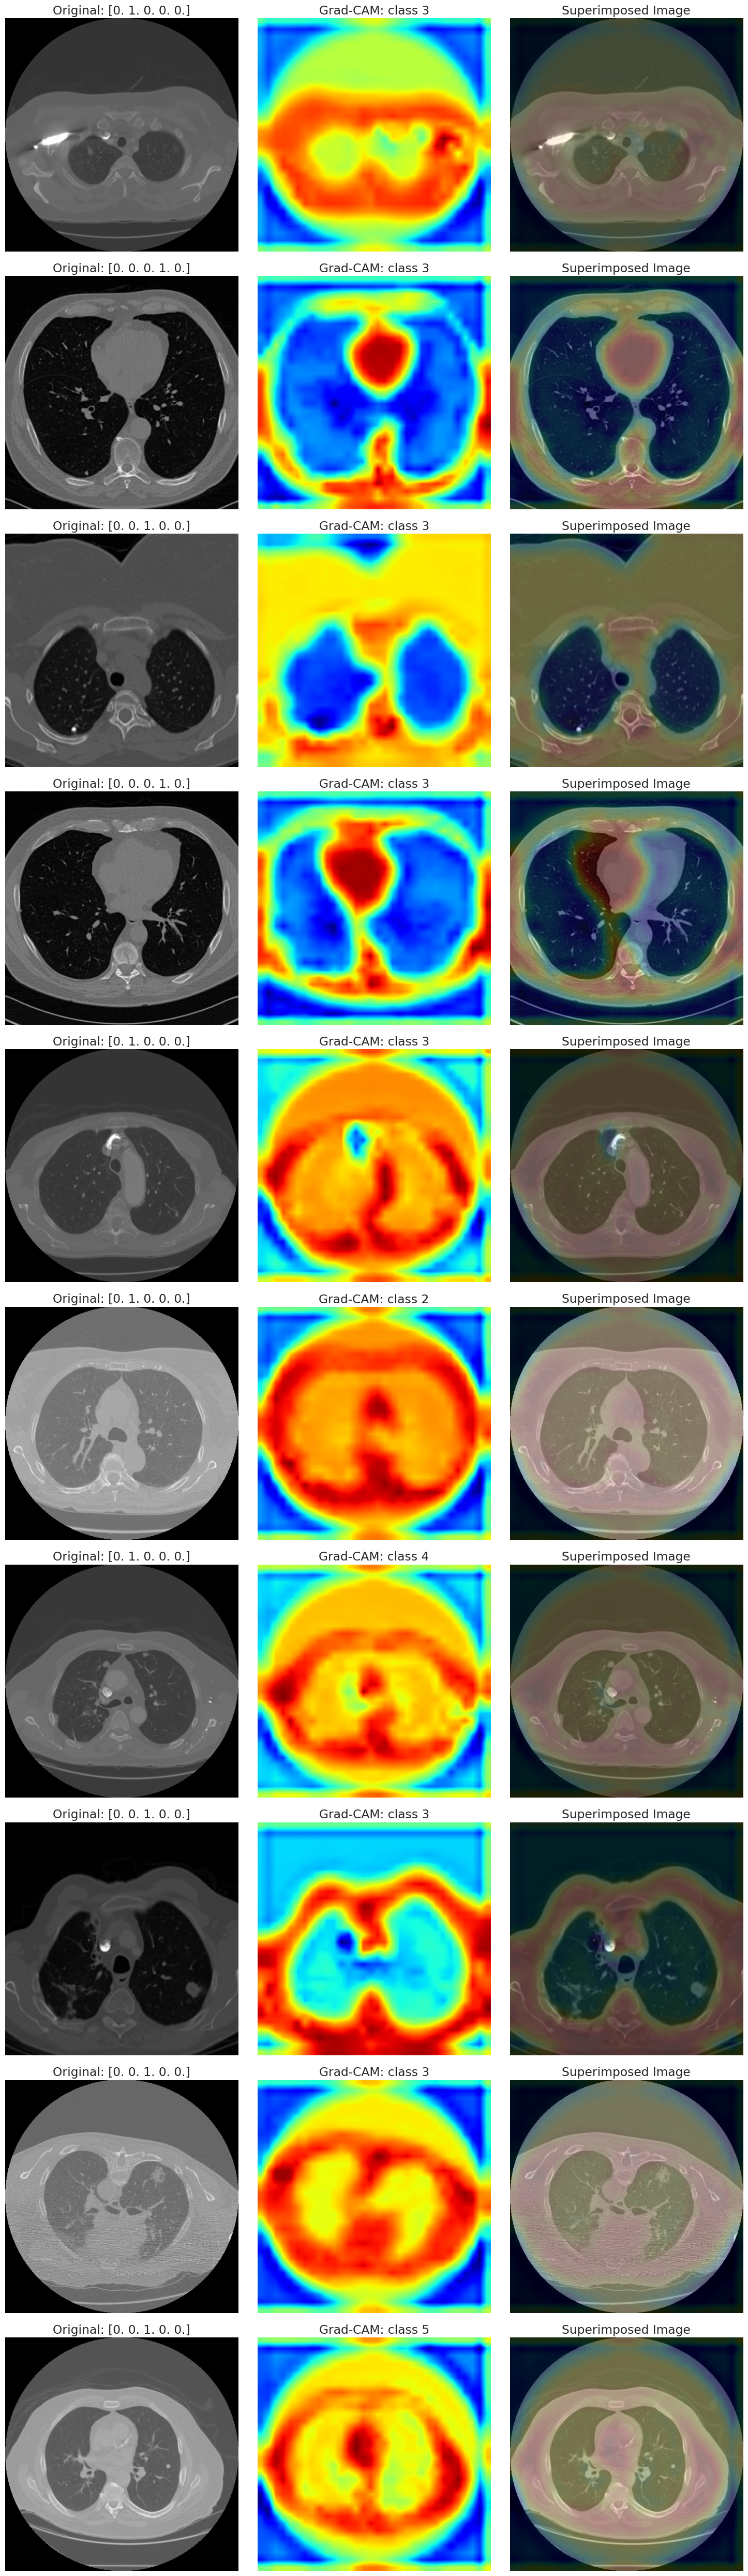

In [ ]:
from matplotlib import cm
def display_multiple_gradcams(model, img_array, class_tumor, class_tumor_pred, indices, layer_name, alpha=0.01, n_images=10):
    '''
    Funzione per visualizzare più heatmap Grad-CAM sovrapposte alle immagini originali.

    Args:
      model: il modello Keras
      img_array: array di immagini preprocessate (array di dimensione [n_images, h, w, c])
      indices: lista degli indici delle immagini da visualizzare
      layer_name: nome del layer per Grad-CAM
      alpha: parametro di trasparenza per la heatmap sovrapposta
      n_images: numero di immagini da visualizzare
    '''
    # Crea una figura con 10 righe e 3 colonne (per immagine originale, heatmap, e sovrapposizione)
    plt.figure(figsize=(15, n_images * 5))

    for i in range(n_images):
        img_index = indices[i]
        img = img_array[img_index]

        # Calcola la Grad-CAM per l'immagine corrente
        grad_cam, _ = GradCam(model, np.expand_dims(img, axis=0), layer_name)

        # Ridimensiona la heatmap per farla corrispondere alle dimensioni dell'immagine originale
        grad_cam = np.uint8(255 * grad_cam)  # Assicurati che la heatmap sia in formato uint8
        jet = cm.get_cmap("jet")  # Usa la colormap 'jet' di matplotlib
        jet_colors = jet(np.arange(256))[:, :3]
        jet_heatmap = jet_colors[grad_cam]

        # Converti la heatmap in immagine RGB
        jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
        jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))  # Allinea le dimensioni

        jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

        # Sovrapponi la heatmap sull'immagine originale
        superimposed_img = jet_heatmap * alpha + img

        # Converti l'immagine combinata in formato da visualizzare
        superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
        jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)

        # Immagine originale
        plt.subplot(n_images, 3, i * 3 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Original: {class_tumor[i]}")
        plt.axis('off')

        # Heatmap
        plt.subplot(n_images, 3, i * 3 + 2)
        plt.imshow(jet_heatmap)
        plt.title(f"Grad-CAM: class {class_tumor_pred[i]}")
        plt.axis('off')

        # Immagine sovrapposta
        plt.subplot(n_images, 3, i * 3 + 3)
        plt.imshow(superimposed_img)
        plt.title(f"Superimposed Image")
        plt.axis('off')

    # Mostra la figura
    plt.tight_layout()
    plt.show()

# Assicurati di chiamare il modello con un input valido
# Esempio di chiamata per visualizzare 10 immagini
indices_to_display = [i for i in range(10)]  # Modifica questa lista con gli indici delle immagini che vuoi visualizzare
display_multiple_gradcams(model_full, X_val_full, y_val_full,pred_classes_full, indices_to_display, layer_name='conv4', alpha=0.01, n_images=10)

ADD +1 in the predictions